In [ ]:
# Libraries
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None  # default='warn'


## Personal Info Exploratory Analysis for patients

In [64]:
#helper function that creates bar charts
def my_graph(parameters_title,pos_percentage,title):


    # Figure Size
    fig, ax = plt.subplots(figsize =(6, 2))

    # Horizontal Bar Plot
    ax.barh(parameters_title, pos_percentage,color=(0.2, 0.4, 0.6, 0.6))

    # Remove axes splines
    for s in ['top', 'bottom', 'left', 'right']:
        ax.spines[s].set_visible(False)

    # Remove x, y Ticks
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')

    # Add padding between axes and labels
    ax.xaxis.set_tick_params(pad = 1)
    ax.yaxis.set_tick_params(pad = 10)

    # Add x, y gridlines
    ax.grid(b = True, color ='grey',
            linestyle ='-.', linewidth = 0.9,
            alpha = 0.2)

    # Show top values
    ax.invert_yaxis()

    # Add annotation to bars
    for i in ax.patches:
        plt.text(i.get_width()+0.01, i.get_y()+0.4,
                str(round((i.get_width()), 2)),
                fontsize = 10, fontweight ='bold',
                color ='grey')

    # Add Plot Title
    ax.set_title(title,
                loc ='left', )

    # Show Plot
    plt.show()


In [3]:
%store -r patients_personalInfo

In [4]:
patients_personalInfo


,sex,age,education,family,occupation,income,nationality,nursing field,nursing days,safety evaluation,comments
0,2,30,8,3,1,2,2,1,5.0,5.0,oxi
1,2,72,4,3,3,1,1,2,7.0,3.0,Περιστέρια στον θάλαμο
2,2,58,3,3,1,1,1,2,6.0,5.0,oxi
3,2,71,1,3,3,1,1,2,7.0,5.0,Peristeria ston thalamo
4,2,72,1,3,3,1,1,2,7.0,5.0,peristeria ston thalamo
5,2,58,3,1,3,1,1,1,7.0,3.0,oxi
6,2,45,4,3,3,2,2,1,NaN,5.0,oxi
7,1,60,3,2,1,2,1,2,4.0,5.0,oxi
8,1,60,1,1,2,1,1,2,5.0,5.0,oxi
9,2,30,5,1,2,1,1,2,2.0,5.0,oxi


In [106]:
# GENDER

gender = patients_personalInfo['sex']

absolute_frequencies = gender.value_counts()
relative_frequencies = gender.value_counts(normalize=True)

In [107]:
relative_frequencies.index = ['Άνδρας','Γυναίκα']

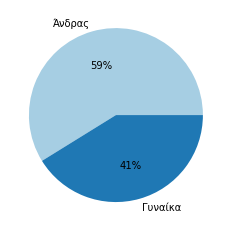

In [110]:
#plot relative_frequencies
colors = sns.color_palette("Paired", 3)

#define data
data = relative_frequencies
labels = relative_frequencies.index

plt.pie(data, labels = labels, colors = colors, autopct='%0.f%%')
plt.show()

In [111]:
# AGE

#split age to classes
def get_num_people_by_age_category(df):
    df["age_group"] = pd.cut(x=df['age'], bins=[0,20,40,60,80,100], labels=["0-20","20-40","40-60","60-80","80-100"])
    return df

patients_personalInfo = get_num_people_by_age_category(patients_personalInfo)


age = patients_personalInfo['age_group']


absolute_frequencies = age.value_counts()
relative_frequencies = age.value_counts(normalize=True)

In [112]:
absolute_frequencies

40-60     10
60-80      4
20-40      3
0-20       0
80-100     0
Name: age_group, dtype: int64

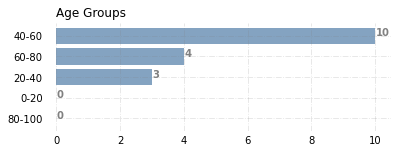

In [113]:
par = ["40-60","60-80","20-40","0-20","80-100"]
title = "Age Groups"


my_graph(par,absolute_frequencies,title)

In [114]:
#EDUCATION

education = patients_personalInfo['education']

absolute_frequencies = education.value_counts()
relative_frequencies = education.value_counts(normalize=True)

In [115]:
relative_frequencies

1    0.352941
4    0.176471
3    0.176471
5    0.176471
8    0.117647
Name: education, dtype: float64

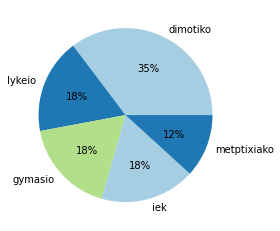

In [116]:
#define data
data = relative_frequencies
labels = ['dimotiko',"lykeio","gymasio","iek","metptixiako"]

plt.pie(data, labels = labels, colors = colors, autopct='%0.f%%')
plt.show()

In [119]:
#EDUCATION

family = patients_personalInfo['family']

absolute_frequencies = family.value_counts()
relative_frequencies = family.value_counts(normalize=True)

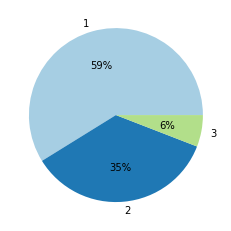

In [120]:
#define data
data = relative_frequencies
labels = ["1","2","3"]

plt.pie(data, labels = labels, colors = colors, autopct='%0.f%%')
plt.show()

In [123]:
#EDUCATION

occupation = patients_personalInfo['occupation']

absolute_frequencies = occupation.value_counts()
relative_frequencies = occupation.value_counts(normalize=True)

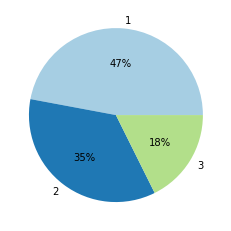

In [125]:
#define data
data = relative_frequencies
labels = ["1","2","3"]

plt.pie(data, labels = labels, colors = colors, autopct='%0.f%%')
plt.show()

In [126]:
#INCOME

income = patients_personalInfo['income']

absolute_frequencies = income.value_counts()
relative_frequencies = income.value_counts(normalize=True)

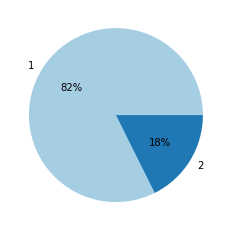

In [128]:
#define data
data = relative_frequencies
labels = ["1","2"]

plt.pie(data, labels = labels, colors = colors, autopct='%0.f%%')
plt.show()

In [129]:
#NATIONALITY

nationality = patients_personalInfo['nationality']

absolute_frequencies = nationality.value_counts()
relative_frequencies = nationality.value_counts(normalize=True)

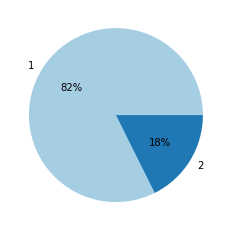

In [130]:
#define data
data = relative_frequencies
labels = ["1","2"]

plt.pie(data, labels = labels, colors = colors, autopct='%0.f%%')
plt.show()

In [131]:
#NURSING FIELD

nursing_field = patients_personalInfo['nursing field']

absolute_frequencies = nursing_field.value_counts()
relative_frequencies = nursing_field.value_counts(normalize=True)

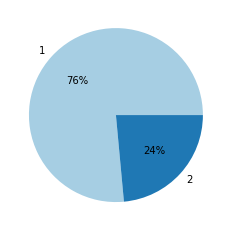

In [132]:
#define data
data = relative_frequencies
labels = ["1","2"]

plt.pie(data, labels = labels, colors = colors, autopct='%0.f%%')
plt.show()

In [133]:
#NURSING DAYS

nursing_field = patients_personalInfo['nursing days']

absolute_frequencies = nursing_field.value_counts()
relative_frequencies = nursing_field.value_counts(normalize=True)

In [135]:
nursing_field

0     5.0
1     7.0
2     6.0
3     7.0
4     7.0
5     7.0
6     NaN
7     4.0
8     5.0
9     2.0
10    5.0
11    5.0
12    5.0
13    5.0
14    5.0
15    5.0
16    7.0
Name: nursing days, dtype: float64

In [136]:
absolute_frequencies

5.0    8
7.0    5
6.0    1
4.0    1
2.0    1
Name: nursing days, dtype: int64